In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import cm

In [2]:
carpeta = os.getcwd()+'/'

G = nx.read_gml(carpeta+'dolphins.gml')

gender = pd.read_csv(carpeta+'dolphinsGender.txt', sep='\t', header=None)
delfines = gender[0] # nombres de delfines (nodos)
genero = gender[1]   # genero de los delfines en el mismo orden que los nodos

# A cada uno de los nodos ya existentes en el grafo, se le agrega el genero
for d,g in zip(delfines,genero):
    G.add_node(d, gender=g)
    
# Tengo el grafo G con los delfines, enlaces, y atributo genero

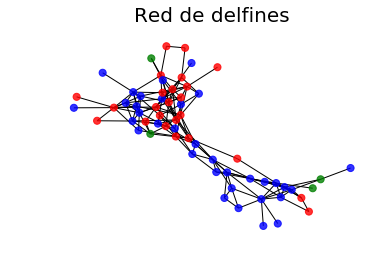

In [3]:
pos = nx.spring_layout(G)

# Nodos
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),
                       node_color=["blue" if g=="m" else "red" if g=="f" else "green" for g in nx.get_node_attributes(G, "gender").values()],
                       with_labels=False,node_size=50,alpha=0.8)

# Enlaces
nx.draw_networkx_edges(G,pos,width=1.0,alpha=1)

#Etiquetas
plt.title('Red de delfines',fontsize=20)
plt.axis('off')
plt.show()

# Comunidades
Creacion de comunidades usando el algoritmo Girvan Newman. Por defecto, lo hace eliminando enlaces segun edge betweenness

In [4]:
# Creo las comunidades 
com = nx.algorithms.community.centrality.girvan_newman(G)
a = [node for node in com] # lista (de listas) de comunidades

# El primer elemento a[0] es una lista con dos elementos correspondiente a la primera división,
# y así va aumentando hasta que el último elemento a[60] son 62 comunidades de un delfín cada una.

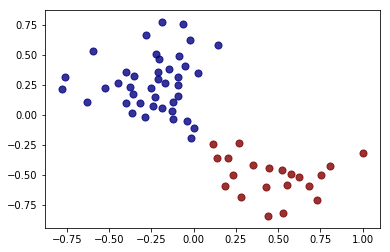

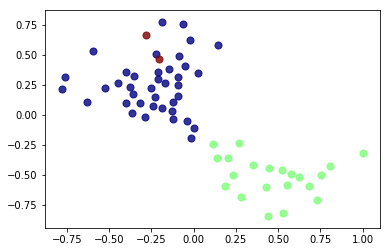

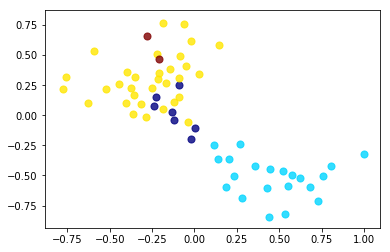

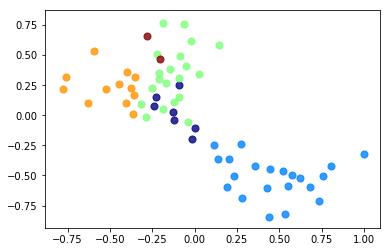

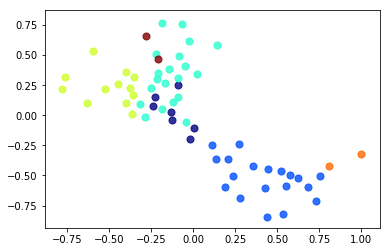

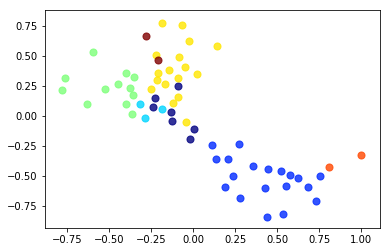

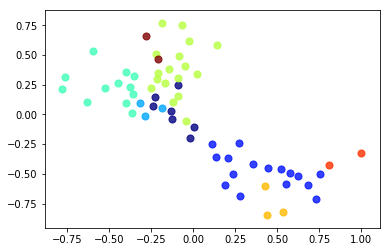

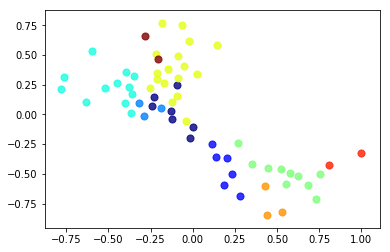

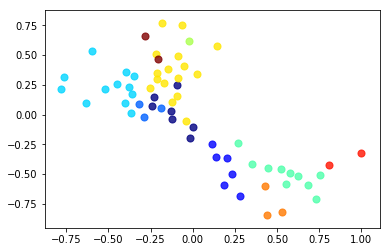

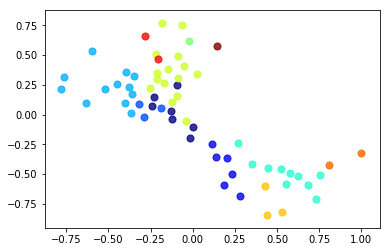

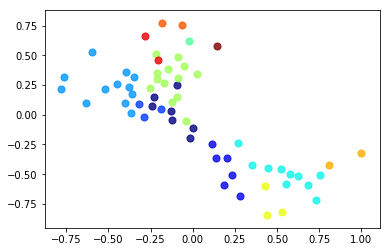

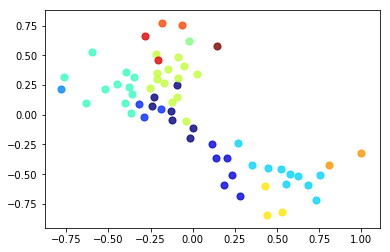

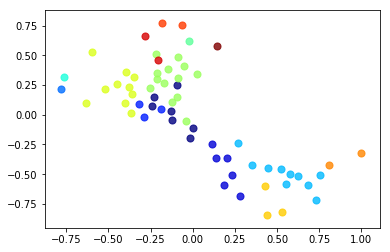

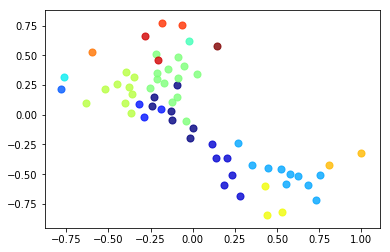

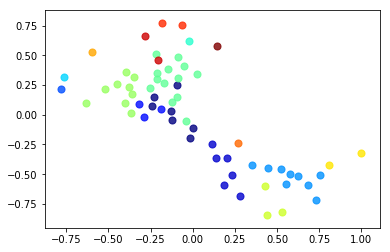

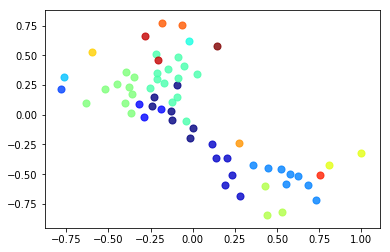

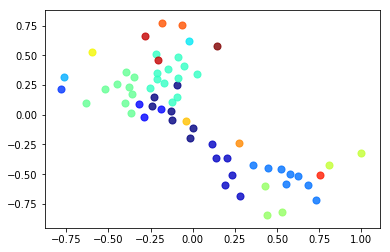

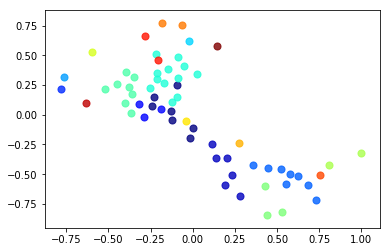

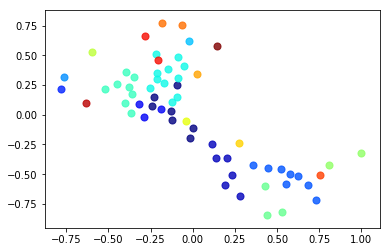

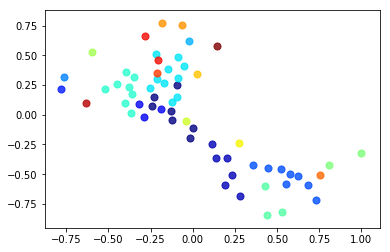

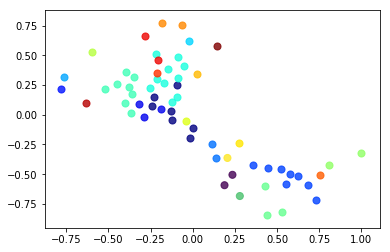

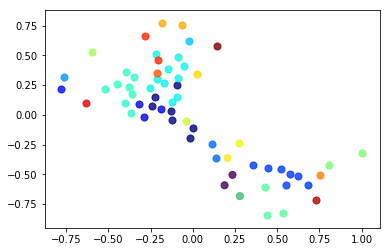

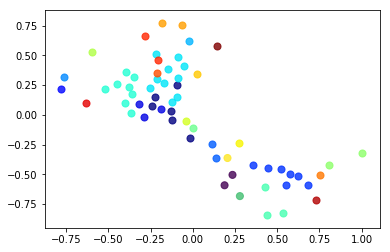

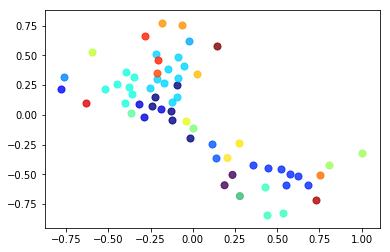

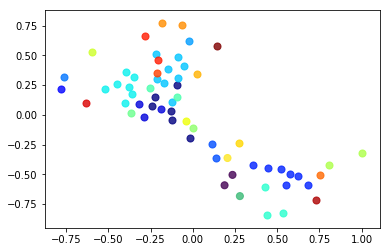

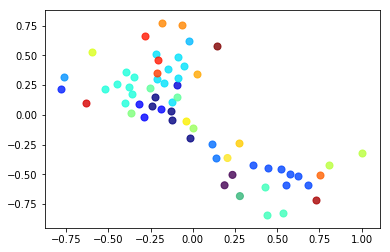

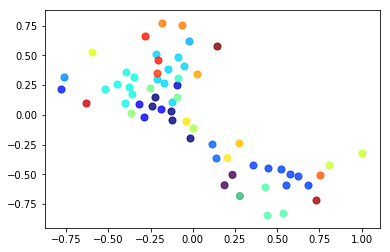

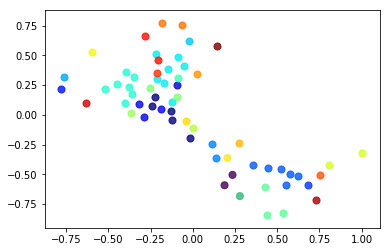

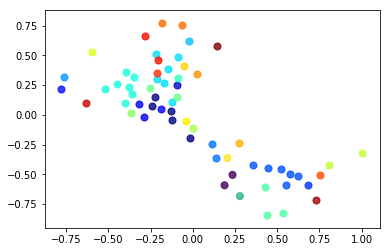

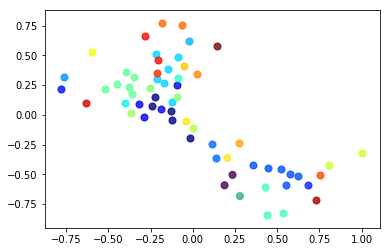

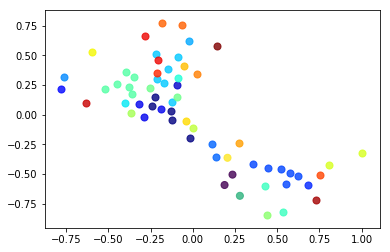

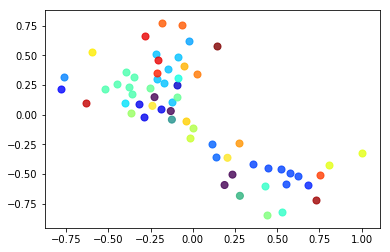

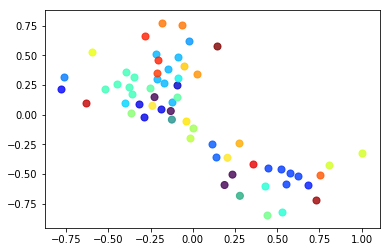

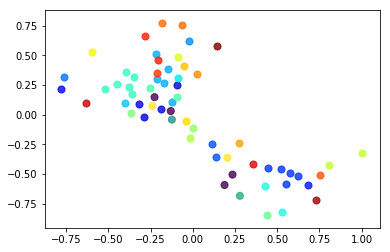

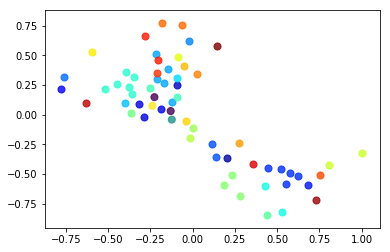

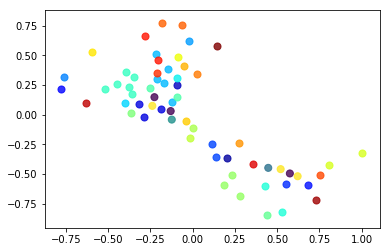

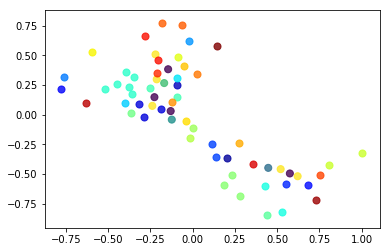

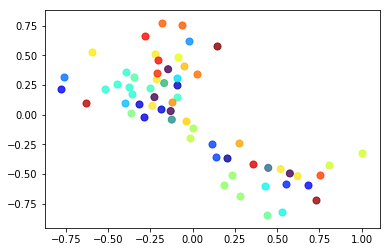

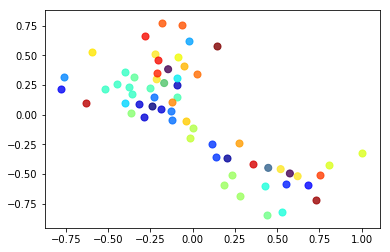

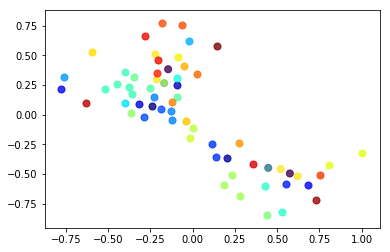

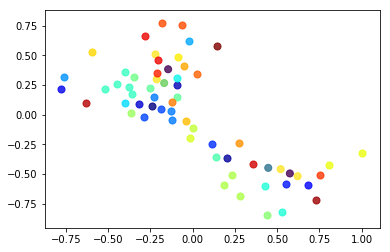

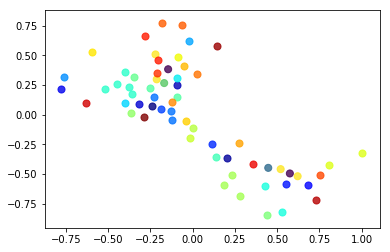

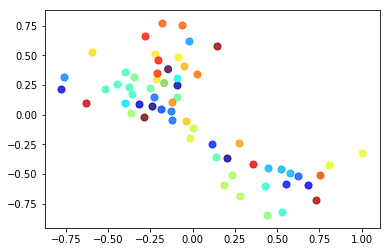

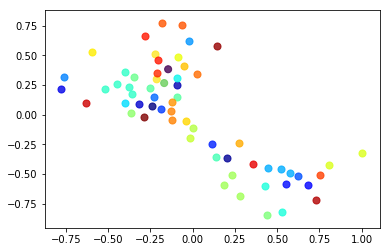

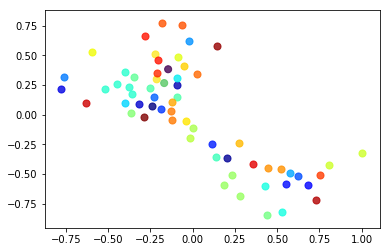

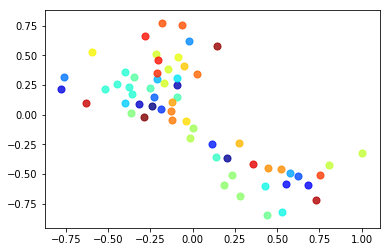

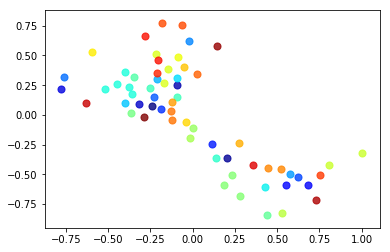

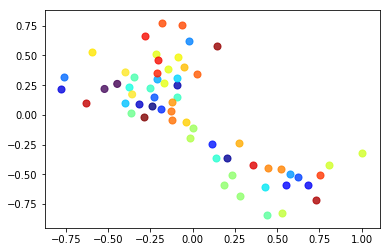

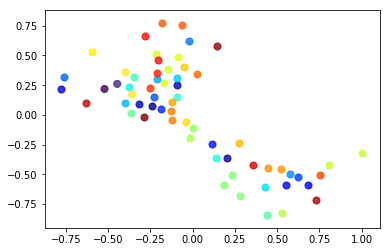

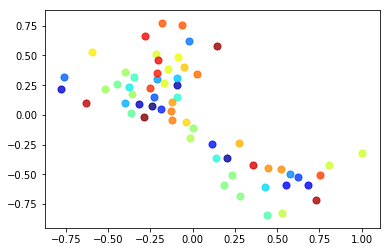

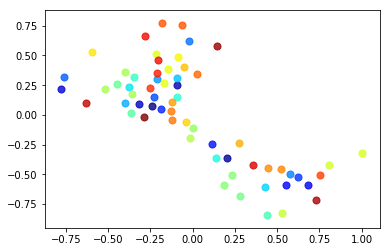

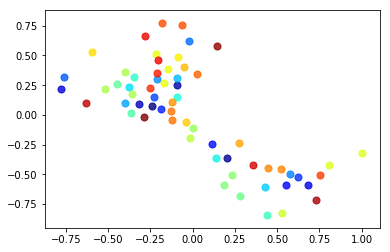

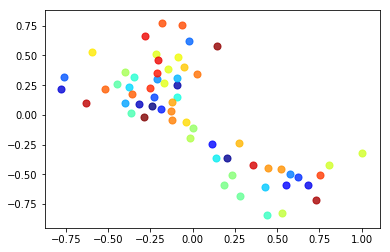

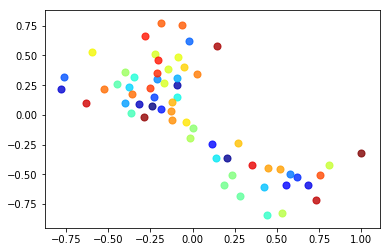

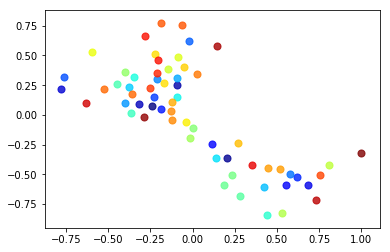

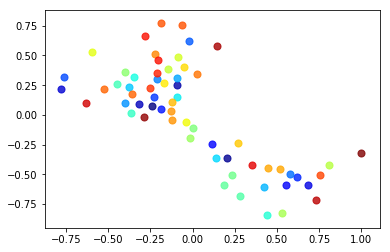

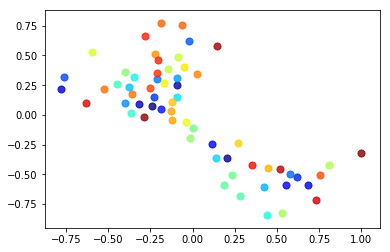

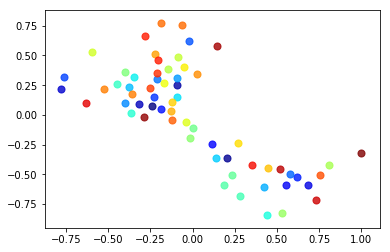

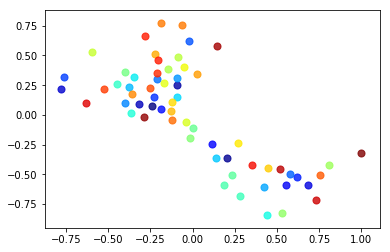

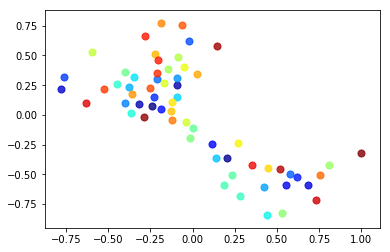

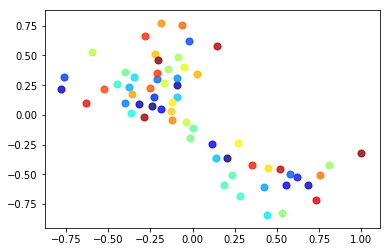

In [17]:
# Para graficar las comunidades por colores, sin enlaces (o se podria con todos los enlaces)
# En cada paso crea un grafico distinto

it = len(a) # Cantidad de "pasos" de division

for j in range(it):
    coms = a[j] # Elijo un paso de a 
    N = len(coms) # Cantidad de comunidades en ese paso
    colores_com = np.linspace(0,1,N) # quiero N colores, uno por comunidad
    colores = [ cm.jet(x) for x in colores_com ] # transformo en colores del colormap que quiera
    for i in range(N):
        nx.draw_networkx_nodes(G,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
        # Para cada comunidad, dibujo sus nodos con un unico color de colores
    plt.show()

# colormaps que se ven bien: plasma, gist_rainbow, jet

In [7]:
# Para animarlo. En mi pc no funciona animation así que no sé si está bien escrito
from matplotlib import animation

def animacion(j,a,G):
    coms = a[j]
    N = len(coms) # Cantidad de nodos en la comunidad
    colores_com = np.linspace(0,1,N) # quiero N colores, uno por comunidad
    colores = [ cm.jet(x) for x in colores_com ] # transformo en colores del colormap
    for i in range(N):
        grafo = nx.draw_networkx_nodes(G,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    return grafo,

numframes = len(a)
fig = plt.figure()
anim = animation.FuncAnimation(fig, animacion, frames=numframes,
                              fargs=(a,G),interval=100) #blit=True means only re-draw the parts that have changed.
plt.show()

#anim.save('nodos.mp4', fps=30)


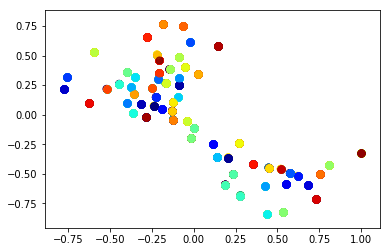

In [37]:
# La forma trucha de hacer la animacion: actualizando un unico grafico en un loop
from IPython import display

it = len(a) # Cantidad de "pasos" de division

for j in range(it):
    coms = a[j]
    N = len(coms)
    colores_com = np.linspace(0,1,N)
    colores = [ cm.jet(x) for x in colores_com ]
    for i in range(N):
        nx.draw_networkx_nodes(G,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.2)


Intenté hacer además gráficos coloreando las comunidades y que se vea cómo van desapareciendo los enlaces.
Así me di cuenta que lo que hace Girvan Newman es tomar EL enlace con mayor edge betweenness, eliminarlo, recalcular, y repetir hasta que haya una componente más. El problema es que yo lo había hecho eliminar LOS enlaces con mayor edge betweenness si el valor máximo aparecía una vez. Por qué no es correcto hacer esto? Debería estar mal elegir uno entre varios enlaces con valor máximo?

159
153


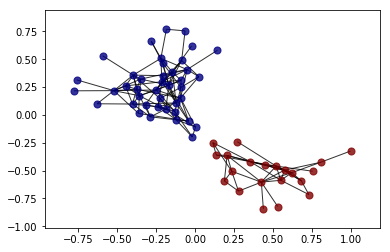

147


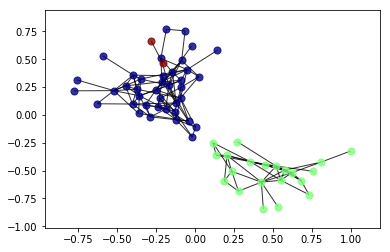

138


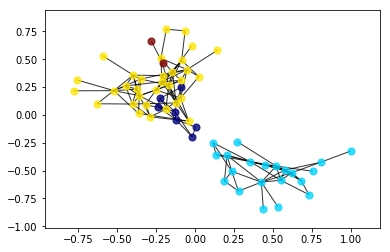

127


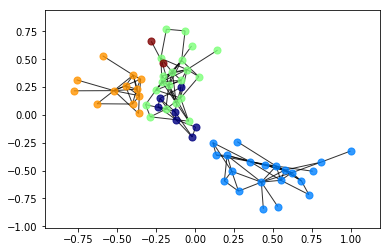

125


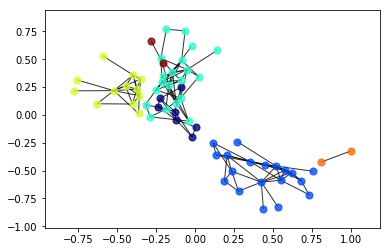

120


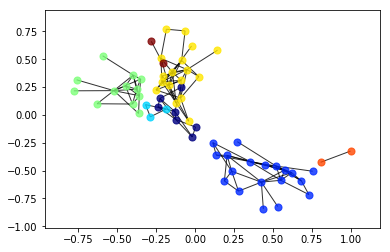

114


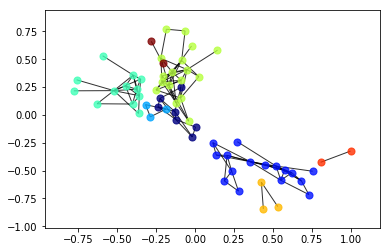

109


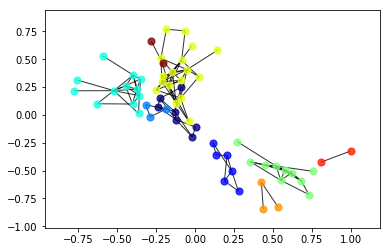

107


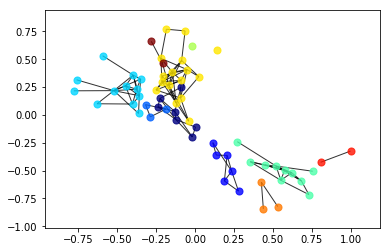

105


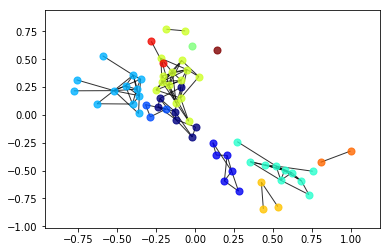

102


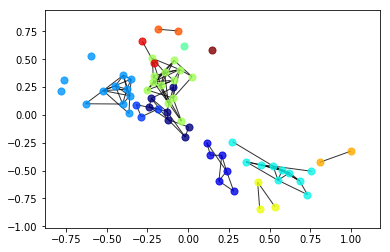

100


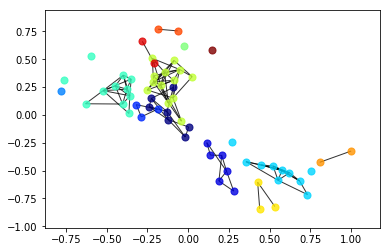

97


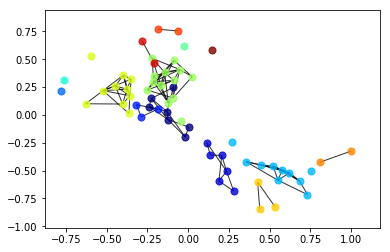

95


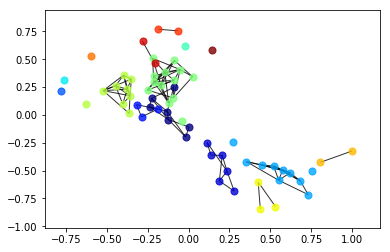

92


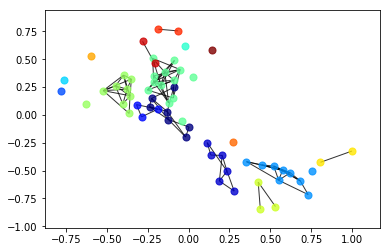

89


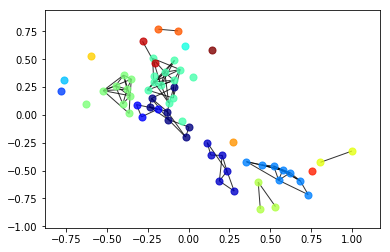

87


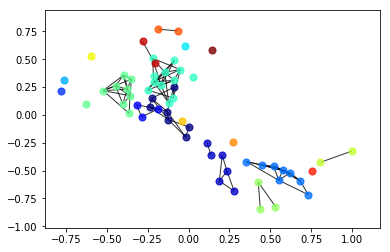

85


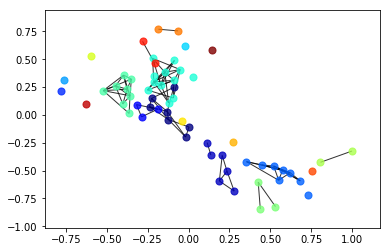

82


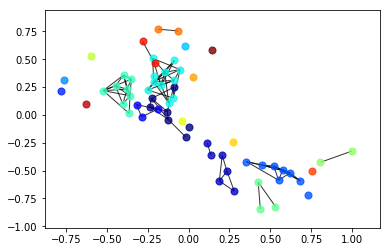

81


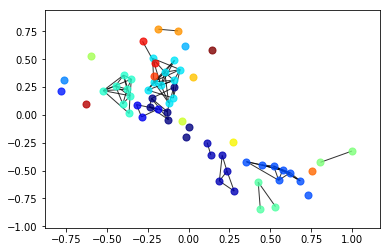

79


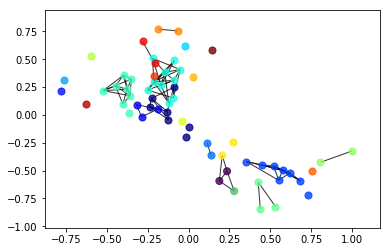

73


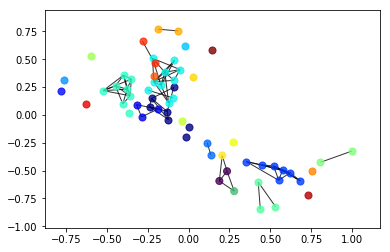

70


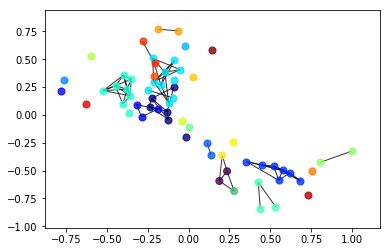

66


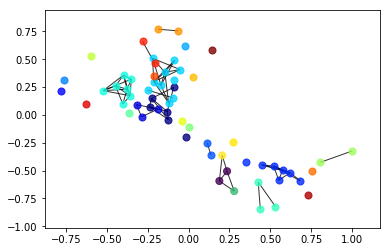

64


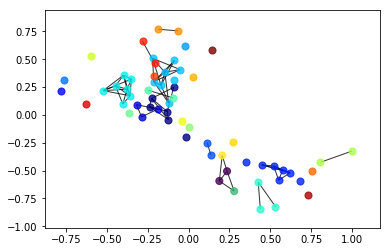

61


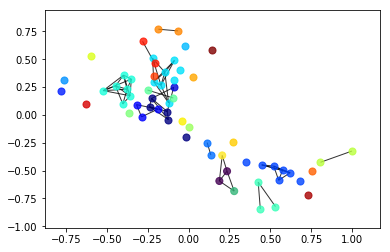

58


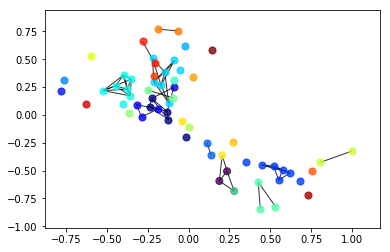

54


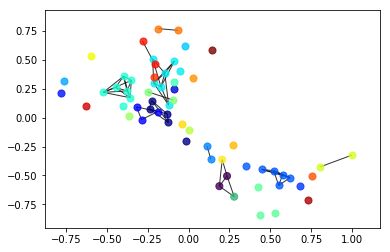

48


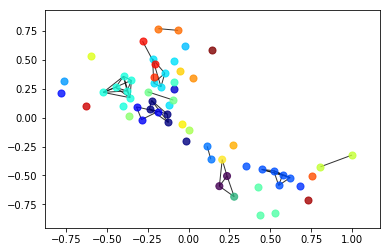

44


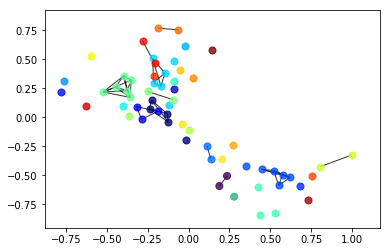

38


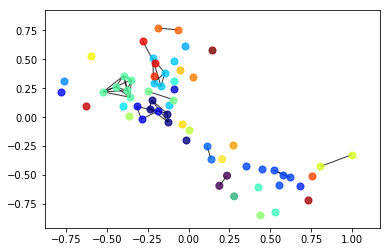

30


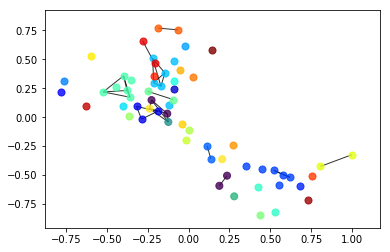

0


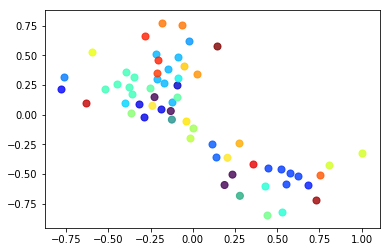

0


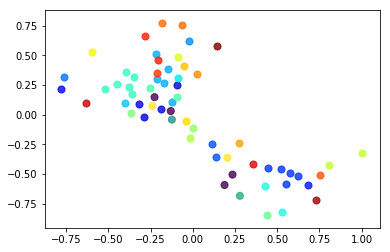

0


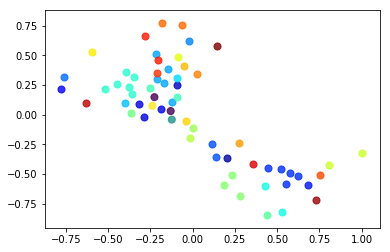

0


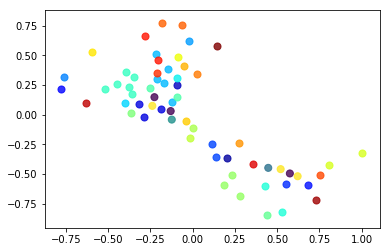

0


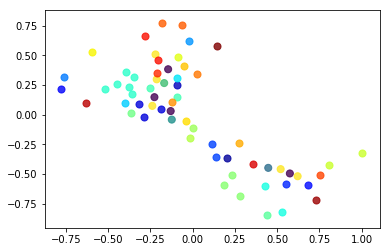

0


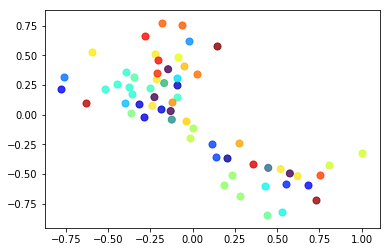

0


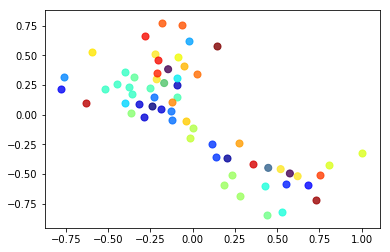

0


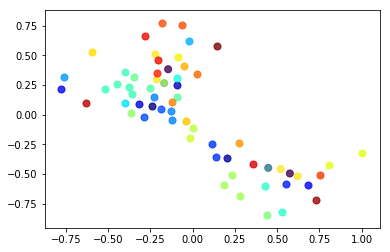

0


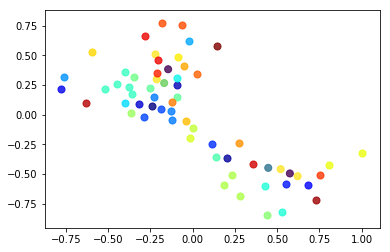

0


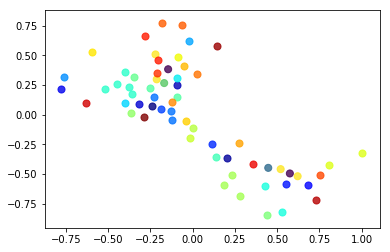

0


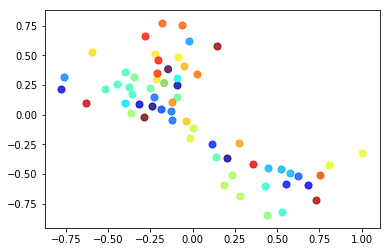

0


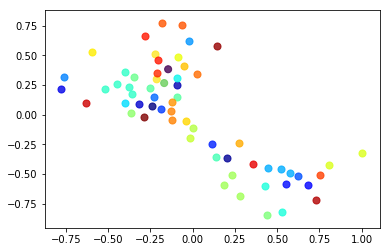

0


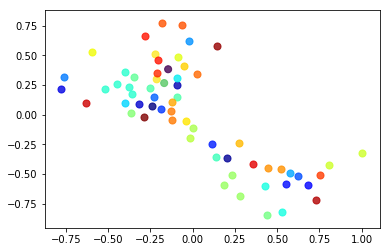

0


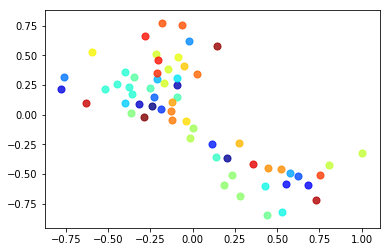

0


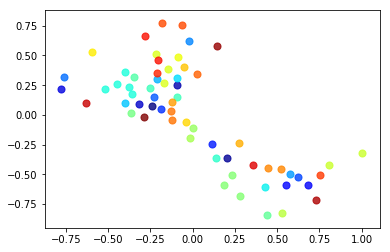

0


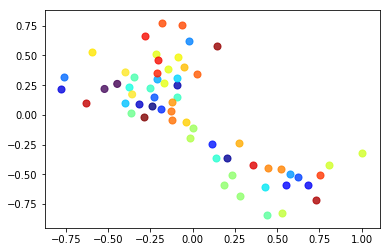

0


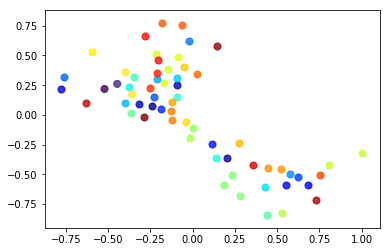

0


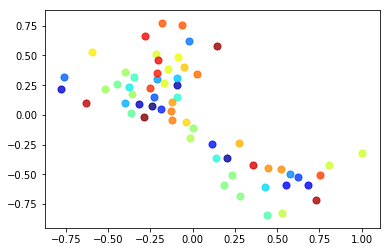

0


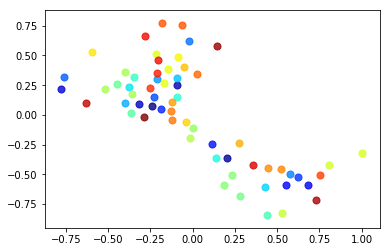

0


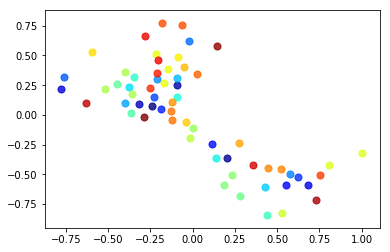

0


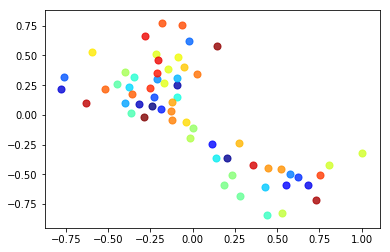

0


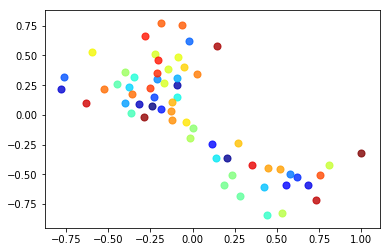

0


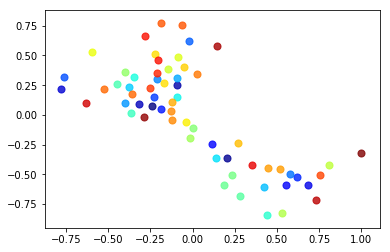

0


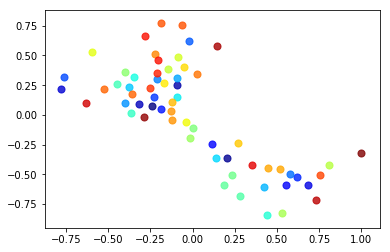

0


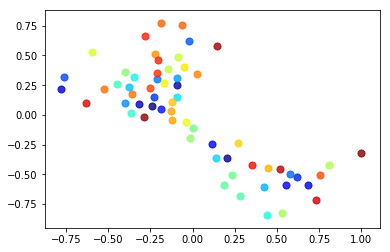

0


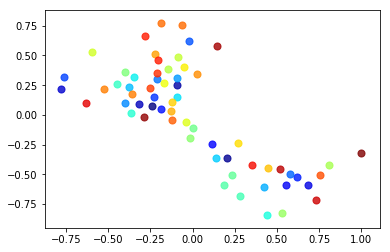

0


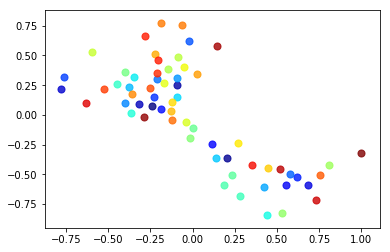

0


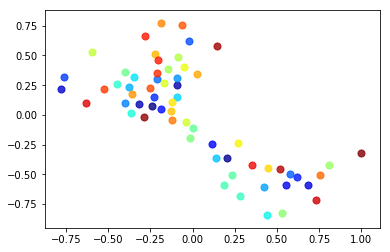

0


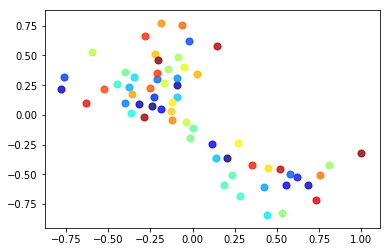

In [52]:
# Para graficar las comunidades por colores, eliminando enlaces
G_copy = nx.read_gml(carpeta+'dolphins.gml')

for d,g in zip(delfines,genero):
    G_copy.add_node(d, gender=g)
print(G_copy.number_of_edges())
it = len(a)

for j in range(it):
    coms = a[j]
    N = len(coms)
    colores_com = np.linspace(0,1,N)
    colores = [ cm.jet(x) for x in colores_com ]
    for i in range(N):
        nx.draw_networkx_nodes(G_copy,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    n = nx.number_connected_components(G_copy)
    while nx.number_connected_components(G_copy)==n:
        eb = nx.edge_betweenness_centrality(G_copy) # Diccionario con enlaces y correspondiente edge betweenness
        borrar = [d for d, v in eb.items() if v == max(eb.values())] # Lista de enlaces con el mayor edge betweenness
        G_copy.remove_edges_from(borrar)
        if G_copy.number_of_edges()==0:
            break
    enlaces = list(G_copy.edges())
    nx.draw_networkx_edges(G_copy,pos,edgelist=enlaces,alpha=0.8)
    print(G_copy.number_of_edges())
    plt.show()


159
71


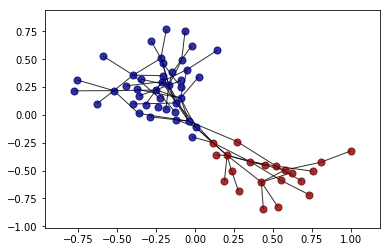

70


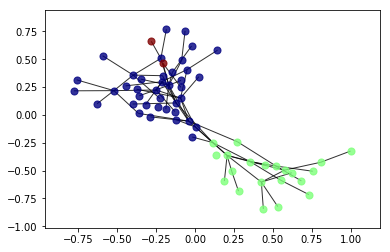

69


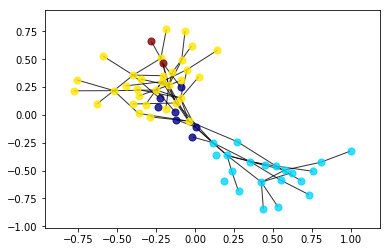

68


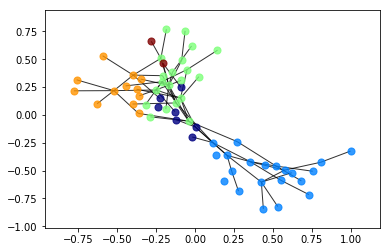

67


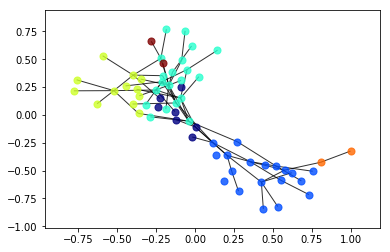

66


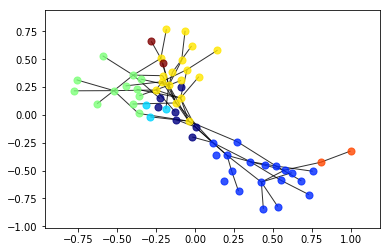

65


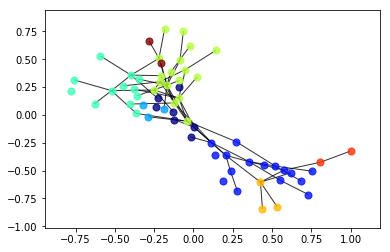

64


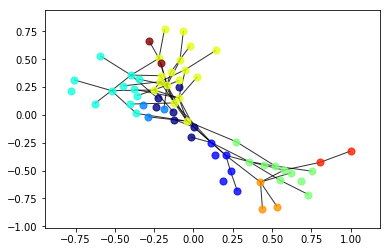

62


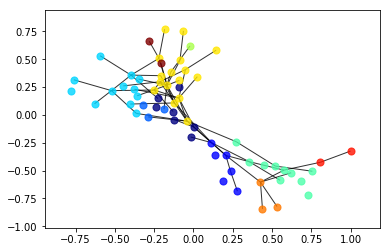

61


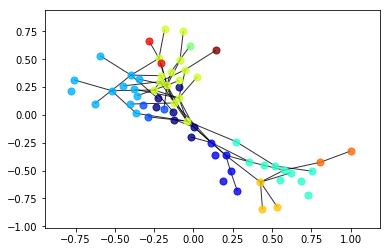

60


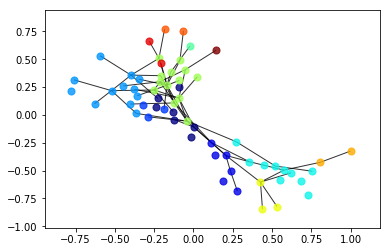

59


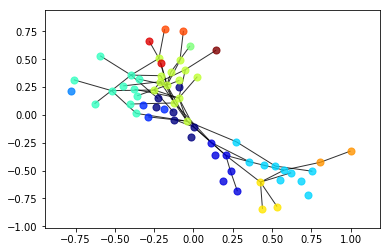

58


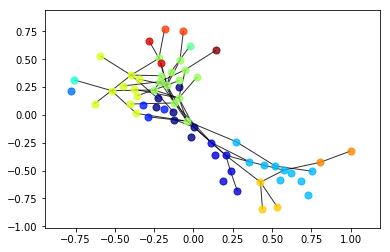

57


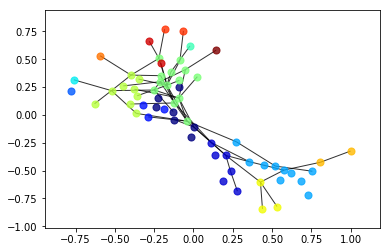

55


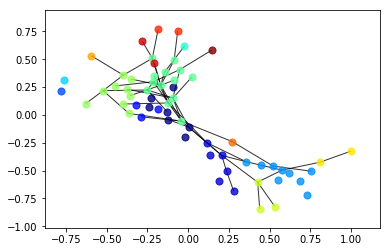

54


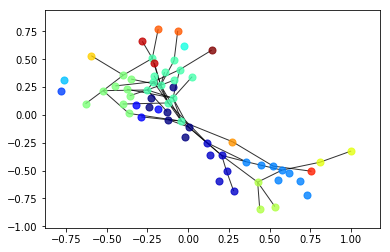

53


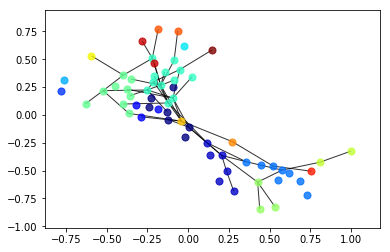

48


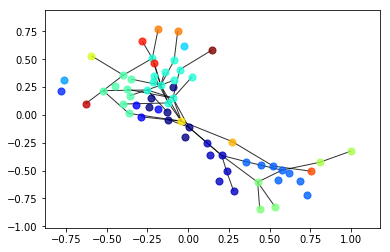

46


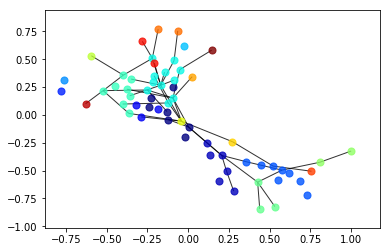

45


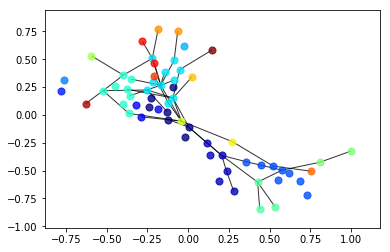

44


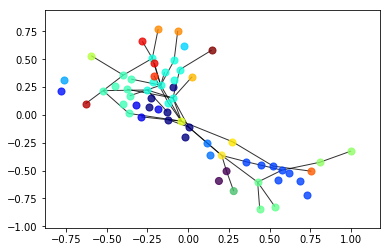

43


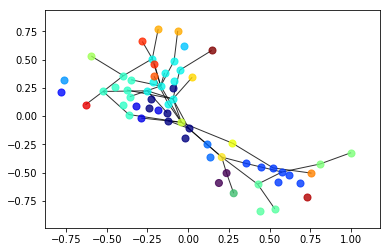

42


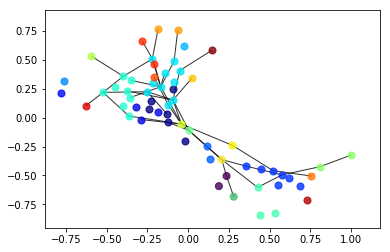

41


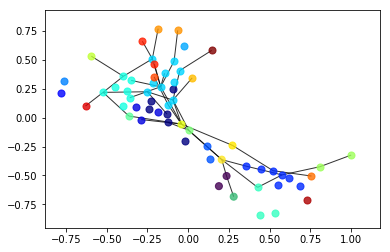

40


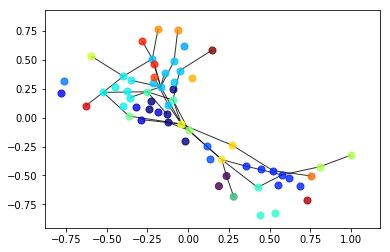

39


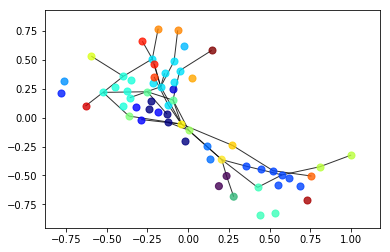

38


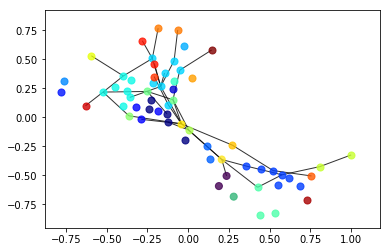

37


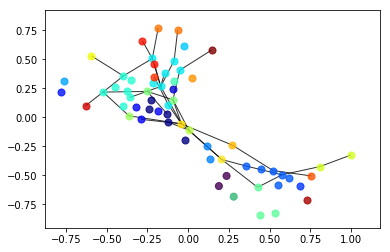

36


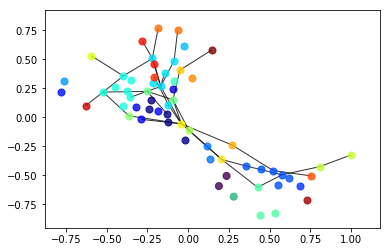

34


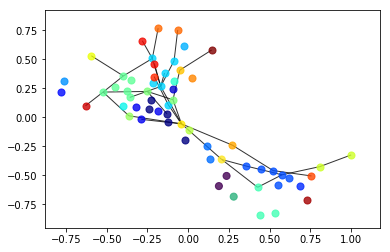

32


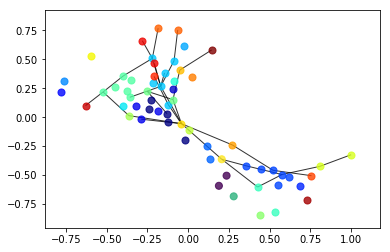

30


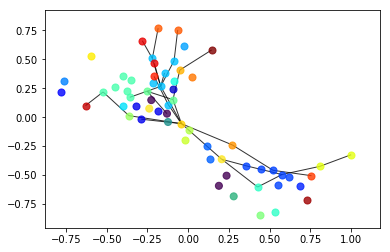

29


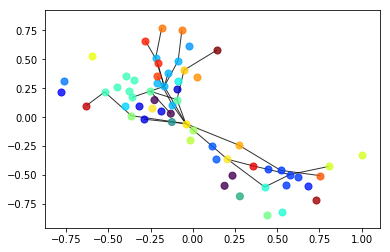

27


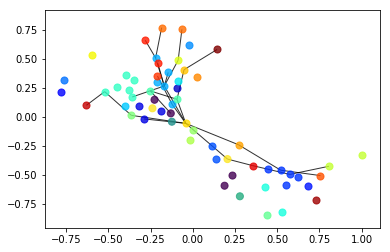

26


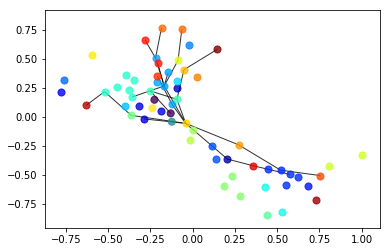

25


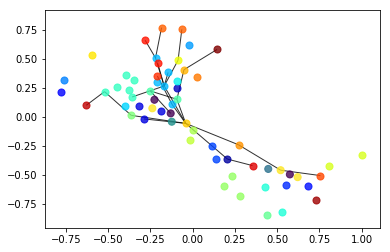

24


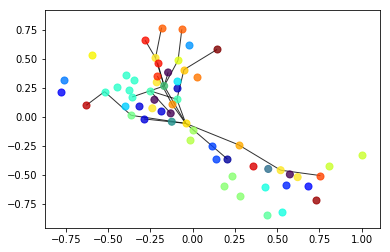

23


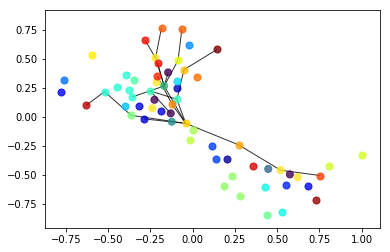

22


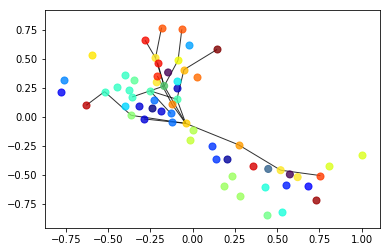

21


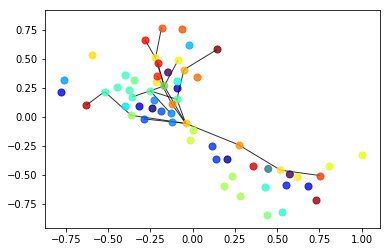

20


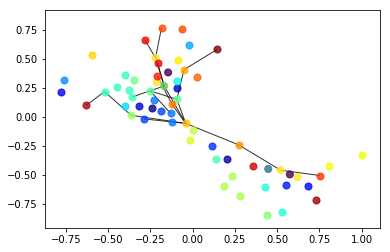

19


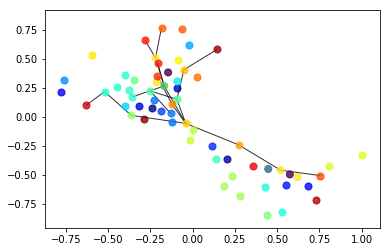

18


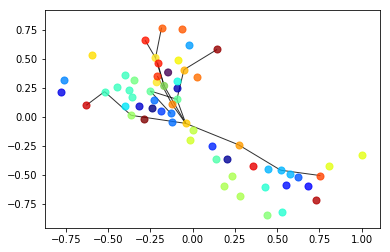

17


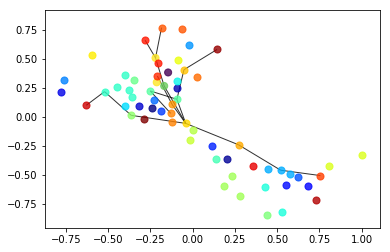

16


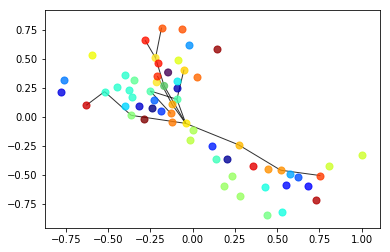

15


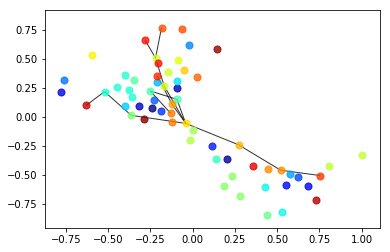

14


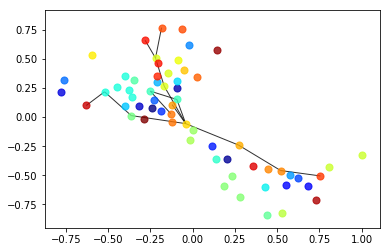

13


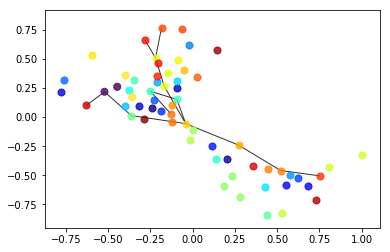

12


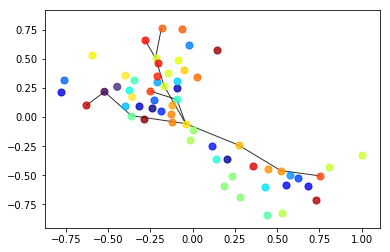

11


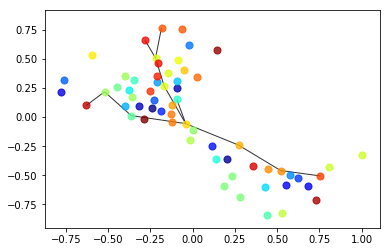

10


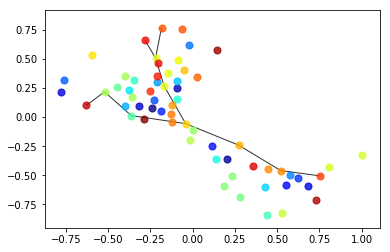

9


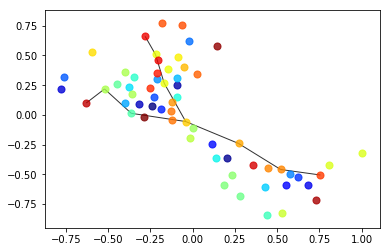

8


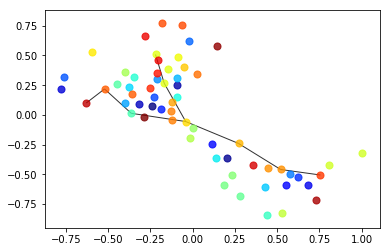

7


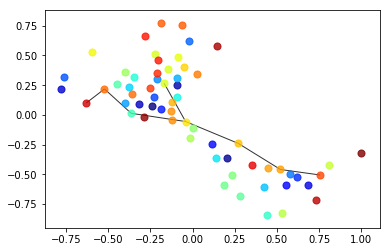

6


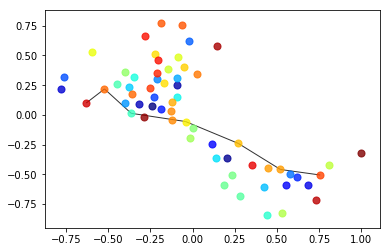

5


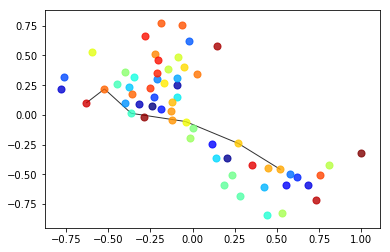

4


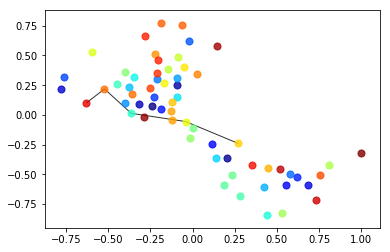

3


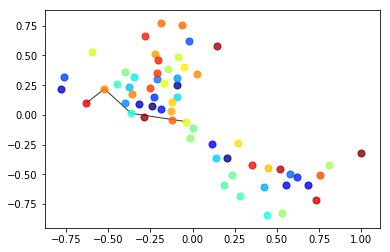

2


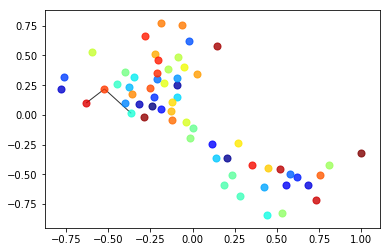

1


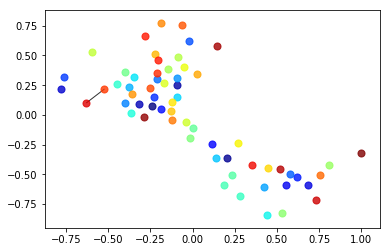

0


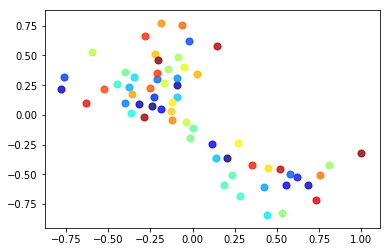

In [53]:
# Para graficar las comunidades por colores, eliminando enlaces
G_copy = nx.read_gml(carpeta+'dolphins.gml')

for d,g in zip(delfines,genero):
    G_copy.add_node(d, gender=g)
print(G_copy.number_of_edges())
it = len(a)

for j in range(it):
    coms = a[j]
    N = len(coms)
    colores_com = np.linspace(0,1,N)
    colores = [ cm.jet(x) for x in colores_com ]
    for i in range(N):
        nx.draw_networkx_nodes(G_copy,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    n = nx.number_connected_components(G_copy)
    while nx.number_connected_components(G_copy)==n:
        eb = nx.edge_betweenness_centrality(G_copy) # Diccionario con enlaces y correspondiente edge betweenness
        borrar = sorted(eb, key=eb.__getitem__) # Lista de enlaces de mayor a menor edge betweenness
        G_copy.remove_edge(*borrar[0])
        if G_copy.number_of_edges()==0:
            break
    enlaces = list(G_copy.edges())
    nx.draw_networkx_edges(G_copy,pos,edgelist=enlaces,alpha=0.8)
    print(G_copy.number_of_edges())
    plt.show()
